Numerical Python (numpy): arrays
================================

Introduzione a Numpy 
------------------

La librery NumPy (NUMerical PYthon) fornisce

-   un nuovo tipo di struttura dei dati chiamata `array`s che permette

-   di eseguire in modo efficiente operazioni su vettori e matrici. Fornisce inoltre

-   diverse  operazioni legate all'algebra lineare (come risolvere sistemi di equazioni lineari, calcolo di autovettori e autovalori).

## L'array

NumPy introduce un nuovo tipo di dati detto “`array`”. Un array *sembra* molto simile a una lista ma un array può contenere solo elementi di un singolo tipo (mentre una lista può contenere oggetti di tipo diverso). Questo significa che gli array possono essere scritti in memoria in modo più efficiente. Gli array sono la struttura di dati migliore per i calcoli numerici in cui spesso si ha a che fare con vettori e matrici di tipo omogeneo.

Vettori, matrici bidimensionali e matrici con più di due indici sono tutti chiamati “arrays” in NumPy.

### Vettor1 (1d-arrays)

La struttura dati data che useremo più spesso è il vettore. Qualche esempio di come crearne uno:

-   Conversione di una lista (o tuple) in un array usando <span>`numpy.array`</span>:

In [2]:
import numpy as np
x = np.array([0, 0.5, 1, 1.5])
print(x)

[0.  0.5 1.  1.5]


In [18]:
type(x)

numpy.ndarray

In [2]:
type([0, 0.5, 1, 1.5])

list

In [3]:
x

array([0. , 0.5, 1. , 1.5])

- Creazione di un vettore usando "arange":

In [20]:
x = np.arange(0, 2, 0.5)
print(x)

[0.  0.5 1.  1.5]


-   Creazione di un vettore di zeri, di uno

In [21]:
x = np.zeros(4)
print(x)
y = np.ones(10)
print(y)

[0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### I comandi linspace() e logspace()

In Numpy esiste il comando `linspace(x0, x1, n)`, che genera una lista di `n` elementi equidistanti fra `x0` e `x1` (inclusi). Il comando `logspace(x0, x1, n)` genera una lista di `n` elementi equidistanti, in scala logaritmica, fra `10\*\*x0` e `10\*\*x1`; è utile per fare plot logaritmici come vedremo in 08_plots. Alcuni esempi:

In [6]:
np.linspace(0,10,1001)

array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ])

In [5]:
np.linspace(-1,1,21)

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

Ricordate che i primi due argomenti di logspace sono i logaritmi in base 10 del punto iniziale e di quello finale.

In [64]:
np.logspace(1,4,4)
#np.logspace(1.7,4.4,40)

array([   10.,   100.,  1000., 10000.])

#### Come scegliere o modificare il `tipo` di dati di un array

Quando viene creato un array è possibile specificare il tipo di dati che contiene. I tipi possibili sono: 'float', 'complex', 'int', 'bool', 'str' and 'object'. Un controllo più fine si può avere usando espressioni come 'float32', 'float64', 'int8', 'int16' oppure 'int32'; l'intero specifica il numero di bytes. 

In [9]:
array_f = np.array([1,2,3], dtype='float')
array_i = np.array([1,2,3], dtype='int16')

In [10]:
array_f

array([1., 2., 3.])

In [11]:
array_i

array([1, 2, 3], dtype=int16)

In [14]:
np.array([1,2,123456790],dtype='int32')

array([        1,         2, 123456790], dtype=int32)

Il tipo di un array può essere modificato con il metodo astype

In [15]:
array_f.astype('complex')

array([1.+0.j, 2.+0.j, 3.+0.j])

### Operazioni su array

- Una volta che l'array esiste, possiamo definire e recuperare il valore degli elementi. Per esempio:

In [16]:
x = np.zeros(4)
x[0] = 3.4
x[2] = 4
print(x)

[3.4 0.  4.  0. ]


- I metodi di slicing per le stringhe si possono applicare anche agli array:

In [17]:
print(x[0])
print(x[0:-1])

3.4
[3.4 0.  4. ]


- Come estrarre più elementi da un array

In [18]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
x1 = [x[2],x[3],x[5]]
print(x1)
type(x1)

[2, 3, 5]


list

Per ottenere un array:

In [20]:
x1 = np.array(x1)
print(x1)
type(x1)

[2 3 5]


numpy.ndarray

- Come estrarre più elementi da un array usando un array di indici

In [21]:
ind = [2,3,5]
x[ind]       # Restituisce un array

array([2, 3, 5])

- Quando abbiamo un array possiamo eseguire operazioni su ogni elementi con un solo comando.<BR>
__È sbagliato e dannoso iterare esplicitamente sulle componenti.__

In [22]:
x = np.arange(0, 2, 0.5)
print(x)

[0.  0.5 1.  1.5]


In [23]:
print(x + 10)
print(x*33)

[10.  10.5 11.  11.5]
[ 0.  16.5 33.  49.5]


In [60]:
print(x ** 2)
print(np.sin(x))

[0.   0.25 1.   2.25]
[0.         0.47942554 0.84147098 0.99749499]


In [24]:
y1 = np.array([1.,2.,3.])
y2 = np.array([-1.,-10,+100])
y1+y2

array([  0.,  -8., 103.])

Il modo migliore di applicare una funzione in numpy è definire l'array dei punti in cui la funzione deve essere calcolata e poi applicare la funzione all'array.<BR>
Esempio: per calcolare i valori del polinomio y = 3\* x\*\*3 - 2\*x\*\*2 + 1 fra -5 e 5:

In [5]:
def myfunc(arr):
    return 3*arr**3 -2*arr*arr +1

x = np.linspace(-5,5,101)
print(x)
res = myfunc(x)
res

[-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
  4.8  4.9  5. ]


array([-4.24000e+02, -3.99967e+02, -3.76856e+02, -3.54649e+02,
       -3.33328e+02, -3.12875e+02, -2.93272e+02, -2.74501e+02,
       -2.56544e+02, -2.39383e+02, -2.23000e+02, -2.07377e+02,
       -1.92496e+02, -1.78339e+02, -1.64888e+02, -1.52125e+02,
       -1.40032e+02, -1.28591e+02, -1.17784e+02, -1.07593e+02,
       -9.80000e+01, -8.89870e+01, -8.05360e+01, -7.26290e+01,
       -6.52480e+01, -5.83750e+01, -5.19920e+01, -4.60810e+01,
       -4.06240e+01, -3.56030e+01, -3.10000e+01, -2.67970e+01,
       -2.29760e+01, -1.95190e+01, -1.64080e+01, -1.36250e+01,
       -1.11520e+01, -8.97100e+00, -7.06400e+00, -5.41300e+00,
       -4.00000e+00, -2.80700e+00, -1.81600e+00, -1.00900e+00,
       -3.68000e-01,  1.25000e-01,  4.88000e-01,  7.39000e-01,
        8.96000e-01,  9.77000e-01,  1.00000e+00,  9.83000e-01,
        9.44000e-01,  9.01000e-01,  8.72000e-01,  8.75000e-01,
        9.28000e-01,  1.04900e+00,  1.25600e+00,  1.56700e+00,
        2.00000e+00,  2.57300e+00,  3.30400e+00,  4.211

check:

In [7]:
3*(-4.9)**3 -2*(-4.9)**2 +1.

-399.9670000000001

- Come estrarre da un array gli elementi che soddisfano una condizione data. Nell'esempio gli elementi dispari. 

In [25]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

arr[arr % 2 == 1]

array([1, 3, 5, 7, 9])

oppure, con più flessibilità sul modo di imporre le condizioni:

In [26]:
np.array([x for x in arr if x% 2 == 1])

array([1, 3, 5, 7, 9])

- Come sostituire in un array gli elementi che soddisfano una condizione data con un valore fisso.

In [27]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

arr[arr % 2 == 1] = -1
arr

array([ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1])

- Come ottenere lo stesso risultato senza modificare l'array iniziale.

In [61]:
#help(np.where)

In [28]:
arr = np.arange(10)
out = np.where(arr % 2 == 1, -1, arr)
print(arr)
out

[0 1 2 3 4 5 6 7 8 9]


array([ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1])

In [31]:
#help(np.where)

- Come estrarre gli elementi "unici" e il numero di volte in cui compaiono in un array:

In [36]:
uniqs, counts = np.unique(out, return_counts=True)
print("Unique items : ", uniqs)
print("Counts       : ", counts)

Unique items :  (array([-1,  0,  2,  4,  6,  8]), array([5, 1, 1, 1, 1, 1]))


In [33]:
uniqs2 = np.unique(out)
uniqs2

array([-1,  0,  2,  4,  6,  8])

In [65]:
#help(np.unique)

- Come selezionare gli elementi comuni fra due array.

In [37]:
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])

np.intersect1d(a,b)

array([2, 4])

- Come eliminare da un array `a` tutti gli elementi che compaiono anche in `b`.

In [38]:
a = np.array([1,2,3,4,5])
b = np.array([5,6,7,8,9])

np.setdiff1d(a,b)


array([1, 2, 3, 4])

In [39]:
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])

np.where(a == b)

(array([1, 3, 5, 7]),)

In [24]:
np.asarray(a == b)

array([False,  True, False,  True, False,  True, False,  True, False,
       False])

In [25]:
np.asarray(a == b).nonzero()     # restituisce gli indici degli elementi non nulli cioè di quelli non False

(array([1, 3, 5, 7]),)

In [26]:
c = np.array([-1,0,33,1,0])

In [62]:
#help(np.asarray)

In [63]:
#help(np.nonzero)

- Come estrarre da un array gli elementi in un intervallo dato.

In [41]:
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [42]:
# Metodo 1
index = np.where((a >= 5) & (a <= 10))
print(a[index])

[ 5  6  7  8  9 10]


In [43]:
# Metodo 2:
index = np.where(np.logical_and(a>=5, a<=10))
print(a[index])

# Metodo 3:
a[(a >= 5) & (a <= 10)]

[ 5  6  7  8  9 10]


array([ 5,  6,  7,  8,  9, 10])

<img src="../Humour/hip-hip-array.jpg" width="500" align="center"/>

### Convertire da  array a lista o tuple

Per convertire un array in una lista o una si possono usare le funzioni python standard <span>`list(s0)`</span> e <span>`tuple(s0)`</span> che accettano una sequenza <span>`s0`</span> come input e ritornano rispettivamente  una lista e una ntupla:

In [40]:
a = np.array([1, 4, 10])
a

array([ 1,  4, 10])

In [41]:
list(a)

[1, 4, 10]

In [42]:
tuple(a)

(1, 4, 10)

## Matrici (2d-arrays)

Ecco due modi per creare un array a due dimensioni:

-   Convertendo una lista di liste (o tuples) in un array:

In [44]:
x = np.array([
    [1, 2, 3], [4, 5, 6]
])
x

array([[1, 2, 3],
       [4, 5, 6]])

-   Usare il metodo  <span>`zeros`</span> per creare una matrice di zeri. Un esempio con 5 righe e 4 colonne:

In [32]:
x = np.zeros((5, 4))
x

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

La "forma" di una matrice può essere trovata con il comando `shape` (in questo caso ci sono 2 righe e 3 colonne):

In [45]:
x=np.array([[1, 2, 3], [4, 5, 6]])
print(x)
x.shape

[[1 2 3]
 [4 5 6]]


(2, 3)

I singoli elementi possono essere recuperati con la sintassi seguente:

In [46]:
x=np.array([[1, 2, 3], [4, 5, 6]])
x[0, 0] 

1

In [47]:
x[0, 1]

2

In [36]:
x[0, 2]

3

In [37]:
x[1, 0]

4

In [48]:
x[:, 0]

array([1, 4])

In [49]:
x[0,:]

array([1, 2, 3])

- Un esempio su come sostituire elementi multipli in una matrice<BR>
Supponiamo di voler creare la matrice:
 $$A = \begin{bmatrix} -2 & 0 & 0 \\ 0 & 5 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$
 Un metodo è il seguente:  

In [12]:
A = np.zeros((3,3))
print(A)
vec = np.array([-2,5,1])
indeces = np.array([0,1,2])
A[indeces[:],indeces[:]] = vec[:]
A

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


array([[-2.,  0.,  0.],
       [ 0.,  5.,  0.],
       [ 0.,  0.,  1.]])

### Operazioni standard in Algebra Lineare

#### Vettori

Prodotto interno, esterno, vettoriale

In [50]:
x = np.array([1, 4, 0], float)
y = np.array([2, 2, 1], float)
print("Matrices and vectors.")
print("x:")
print(x)
print("y:")
print(y)

Matrices and vectors.
x:
[1. 4. 0.]
y:
[2. 2. 1.]


In [51]:
print("Inner product of x and y:")
print(np.inner(x, y))

Inner product of x and y:
10.0


In [52]:
print("Outer product of x and y:")
print(np.outer(x, y))

Outer product of x and y:
[[2. 2. 1.]
 [8. 8. 4.]
 [0. 0. 0.]]


In [68]:
print("Cross product of x and y:")
print(np.cross(x, y))

Cross product of x and y:
[ 4. -1. -6.]


#### Moltiplicazione fra matrici

Due arrays possono essere moltiplicato nel senso usuale dell'algebra lineare usando <span>`numpy.dot`</span>. Ecco un esempio:

In [8]:
import numpy as np
import numpy.random       
A = numpy.random.rand(5, 5)    # genera matrice random 5 by 5 
x = numpy.random.rand(5)       # genera un vettore di 5 elementi
print(A)

[[0.48601584 0.86131704 0.35596901 0.89474988 0.58762213]
 [0.58876207 0.81495536 0.7529959  0.39262698 0.66135676]
 [0.88687997 0.65901364 0.39207705 0.23034612 0.18386778]
 [0.85617656 0.53307785 0.14341995 0.63333911 0.98680831]
 [0.74267142 0.84515653 0.23080524 0.64115616 0.30361267]]


In [54]:
print(x)

[0.61046693 0.42096412 0.93950983 0.321917   0.91951374]


In [9]:
b=np.dot(A, x)                  # multiplica la matrice A per il vettore x 
print(b)

[1.47089633 1.42764905 1.06727441 1.27136238 1.27410243]


#### Risolvere un sistema di  equazioni lineari

Per risolvere un sistema di  equazioni lineari `A*x = b`, dato in forma matriciale (cioè `A` è una matrice e `x` e `b` sono vettori, con `A` e `b` noti), possiamo usare la libreria di algebra lineare <span>`linalg`</span> di <span>`numpy`</span>:

In [11]:
import numpy.linalg as LA
x = LA.solve(A, b)
x

array([0.53192132, 0.54903903, 0.30480197, 0.17039768, 0.19668372])

check:

In [10]:
print(np.dot(A,x))
print(b)

[1.47089633 1.42764905 1.06727441 1.27136238 1.27410243]
[1.47089633 1.42764905 1.06727441 1.27136238 1.27410243]


#### Determinante e traccia

In [4]:
X = np.array([[1, 2], [4, 5]])

In [51]:
LA.det(X)

-2.9999999999999996

In [5]:
np.trace(X)

6

In [4]:
#help(np.linalg)

#### Calcolare autovettori e autovalori (eigenvector e eigenvalue)

Ecco un piccolo esempio che calcola gli autovettori e autovalori di una matrice con il comando <span>`eig`</span>:

In [2]:
import numpy.linalg as LA
import numpy as np

R = np.array([[1,2,3], [1,0,1], [0,1,2]])

In [11]:
LA.det(R)

-2.0

In [8]:
evalues, evectors = LA.eig(R)

In [9]:
print(evalues)

[-0.86080585  0.74589831  3.11490754]


Controlliamo se il prodotto degli autovalori è uguale al determinante:

In [10]:
np.prod(evalues)

-2.0

In [14]:
print(evectors)

[[ 0.43464691  0.7699547   0.85535358]
 [-0.85015846  0.49890739  0.38564667]
 [ 0.29717447 -0.39782052  0.34590013]]


**Attenzione:** gli autovettori sono disposti sulle **colonne**.<BR>
    Verifica:

In [21]:
A1=evectors[:,0]
print(A1)

[ 0.43464691 -0.85015846  0.29717447]


In [23]:
print(np.dot(R,A1))

[-0.3741466   0.73182138 -0.25580952]


In [24]:
print(evalues[0]*A1)

[-0.3741466   0.73182138 -0.25580952]


Ciascuno di questi comandi fornisce la propria documentazione. Per esempio, <span>`help(LA.eig)`</span> fornisce dettagli sulla funzione che calcola autovettori e autovalori (Avendo importato `numpy.linalg` come `LA`).

### Come vettorializzare una funzione

Per avere programmi veloci è necessario evitare di ciclare sugli elementi di vettori e matrici usando invece algoritmi vettorializzati. Il primo passo per convertire un algoritmo scalare in un algoritmo vettorializzato è costruire delle funzioni che accettino input vettoriali.

In [1]:
def Theta(x):
    """
    Implemenazione scalare della funzione a gradino di Heaviside.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [2]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

NameError: name 'np' is not defined

Per ottenere una versione vettorializzata di Theta si può utilizzare la  funzione  di Numpy `vectorize`. In molti  casi riesce a vettorializzare automaticamente una funzione:

In [5]:
Theta_vec = np.vectorize(Theta)

In [6]:
Theta_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

### Fit polinomiale di una curva

Assumiamo di avere dei dati x-y che vogliamo interpolare con una curva minimizzando la deviazione quadratica del fit rispetto ai dati).

Numpy fornisce la  funzione <span>`polyfit(x,y,n)`</span> che prende la lista <span>`x`</span> dei valori della coordinata x dei dati, la lista <span>`y`</span> dei valori della coordinata y degli stessi dati e l'ordine del polinomio con cui si vuole interpolare i dati quanto meglio è possibile nel senso dei minimi quadrati.

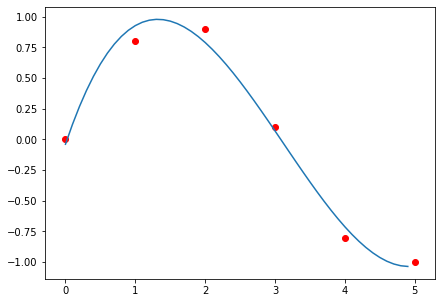

In [6]:
import numpy

# dimostrazione di interpolazione polinomiale: xdata and ydata sono i dati di input
xdata = numpy.array([0.0 , 1.0 , 2.0 , 3.0 , 4.0 , 5.0])
ydata = numpy.array([0.0 , 0.8 , 0.9 , 0.1 , -0.8 , -1.0])
# fittiamo con un polinomio cubico (ordine = 3)
z = numpy.polyfit(xdata, ydata, 3)
# z è un array di coefficienti , iniziando da quello di grado più elevato:
#                 X^3            X^2          X             0
# z = array ([ 0.08703704 , -0.81349206 , 1.69312169 , -0.03968254])
# È conveniente usare l'oggetto ‘poly1d‘ per maneggiare polinomi:
p = numpy.poly1d(z) # crea un polinomio p dai coefficienti
                    # e p può essere valutato per qualunque x.

# Il grafico
xs = [0.1 * i for i in range (50)]
ys = [p (x) for x in xs]   # valuta p(x) per tutti gli x nella lista xs

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(xs,ys, label='fitted curve')
ax.scatter(xdata,ydata, marker='o', c='r')


Il grafico mostra i dati e la curva interpolante (linea solida).

### Ulteriori esempi per numpy …

…si possono trovare in: <http://www.scipy.org/Numpy_Example_List>